<a href="https://colab.research.google.com/github/AnkithS2002/ML_Lab_6th_sem/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running Gradient Descent...


<ipython-input-1-0ad5b84d2b68>:23: RuntimeWarning: overflow encountered in square
  j = np.sum(np.square(h_x - y))*(1/(2*m))
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-1-0ad5b84d2b68>:33: RuntimeWarning: invalid value encountered in subtract
  theta = theta - ((alpha/m) *((np.dot(x.T, (h_x-y) ))))


Theta found by Gradient Descent: slope = [nan] and intercept [nan]


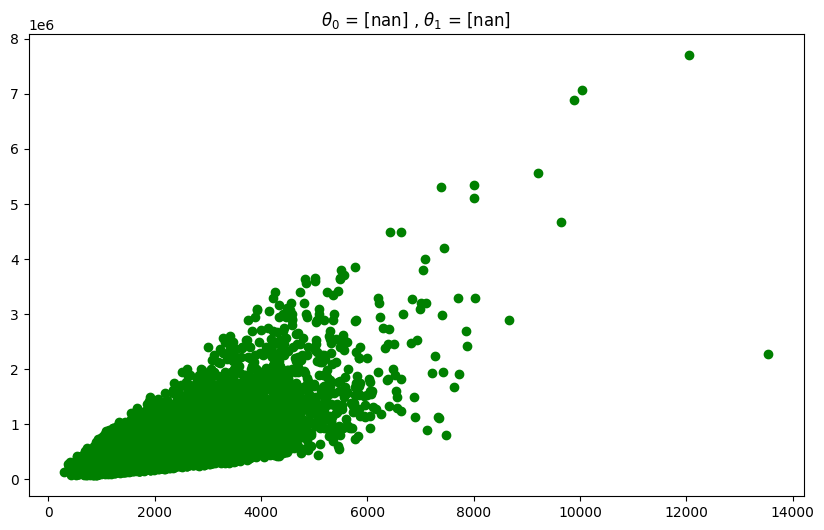

Text(0, 0.5, 'Cost')

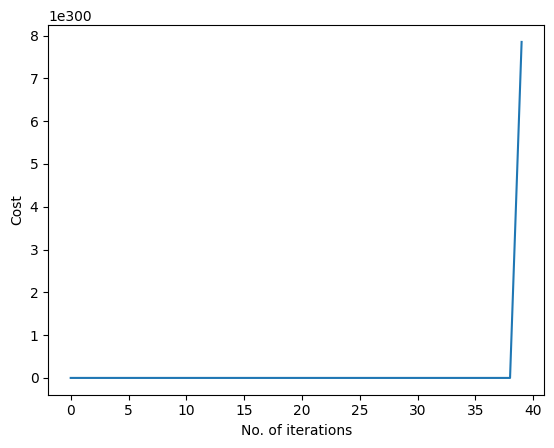

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv('/content/house_data.csv')

Y = dataset[['price']]

X = dataset.drop(['price', 'id', 'date'],  axis=1)

x = X[['sqft_living']]
y = Y

xg = x.values.reshape(-1,1)
yg = y.values.reshape(-1,1)
xg = np.concatenate((np.ones(len(x)).reshape(-1,1), x), axis=1)

def computeCost(x, y, theta):
    m = len(y)
    h_x = x.dot(theta)
    j = np.sum(np.square(h_x - y))*(1/(2*m))
    return j

def gradientDescent(x, y, theta, alpha, iteration):
    print('Running Gradient Descent...')
    j_hist = []
    m = len(y)
    for i in range(iteration):
        j_hist.append(computeCost(x, y, theta))
        h_x = x.dot(theta)
        theta = theta - ((alpha/m) *((np.dot(x.T, (h_x-y) ))))
        #theta[0] = theta[0] - ((alpha/m) *(np.sum((h_x-y))))
    return theta, j_hist

theta = np.zeros((2,1))
iteration = 2000
alpha = 0.001

theta, cost = gradientDescent(xg, yg, theta, alpha, iteration)
print('Theta found by Gradient Descent: slope = {} and intercept {}'.format(theta[1], theta[0]))
theta.shape

plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(theta[0], theta[1]))
plt.scatter(x,y, marker='o', color='g')
plt.plot(x,np.dot(x.values, theta.T))
plt.show()

plt.plot(cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

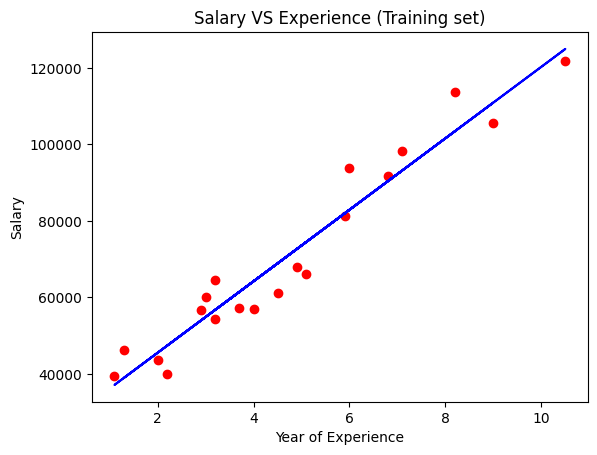

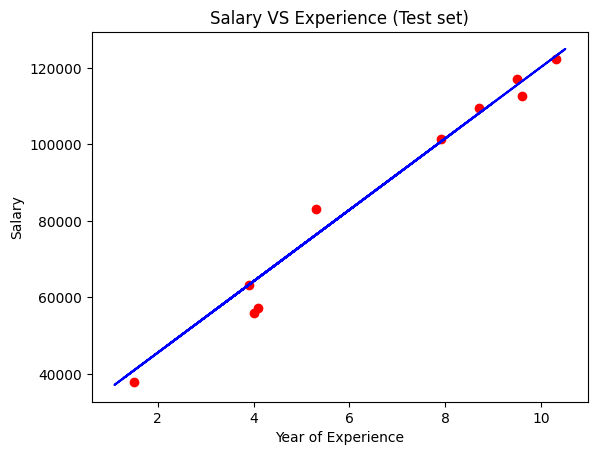

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
#dataset = pd.read_csv('181105_missing-data.csv')
dataset = pd.read_csv('/content/salary_data.csv')
X = dataset.iloc[:, :-1].values #get a copy of dataset exclude last column
y = dataset.iloc[:, 1].values #get array of dataset in column 1st

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)



# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualizing the Training set results
viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.title('Salary VS Experience (Training set)')
viz_train.xlabel('Year of Experience')
viz_train.ylabel('Salary')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, regressor.predict(X_train), color='blue')
viz_test.title('Salary VS Experience (Test set)')
viz_test.xlabel('Year of Experience')
viz_test.ylabel('Salary')
viz_test.show()